In [3]:
# Fazer upload do arquivo CSV
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


# 📊 Análise Exploratória de Vendas E-commerce

## Objetivo
Analisar dados de transações de uma loja de e-commerce internacional para identificar:
- Produtos mais vendidos
- Países com maior volume de vendas
- Ticket médio por região
- Padrões de comportamento de compra
- Sazonalidade nas vendas

## Dataset
- **Fonte:** Kaggle - E-commerce Data
- **Período:** Dez/2010 a Dez/2011
- **Registros:** ~540.000 transações
- **Campos:** InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country

## Tecnologias
- Python 3
- Pandas
- Matplotlib
- Seaborn

In [4]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✅ Bibliotecas importadas com sucesso!")

✅ Bibliotecas importadas com sucesso!


In [5]:
# Carregar dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')

print("📊 Dataset carregado!")
print(f"Dimensões: {df.shape[0]:,} linhas x {df.shape[1]} colunas")
print("\n" + "="*60)
print("Primeiras 5 linhas:")
df.head()


📊 Dataset carregado!
Dimensões: 541,909 linhas x 8 colunas

Primeiras 5 linhas:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Informações gerais do dataset
print("📋 INFORMAÇÕES DO DATASET")
print("="*60)
print(df.info())
print("\n" + "="*60)
print("\n📊 ESTATÍSTICAS DESCRITIVAS")
print("="*60)
df.describe()

📋 INFORMAÇÕES DO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


📊 ESTATÍSTICAS DESCRITIVAS


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


🔍 VALORES FALTANTES
     Coluna  Valores Faltantes  Percentual (%)
 CustomerID             135080       24.926694
Description               1454        0.268311


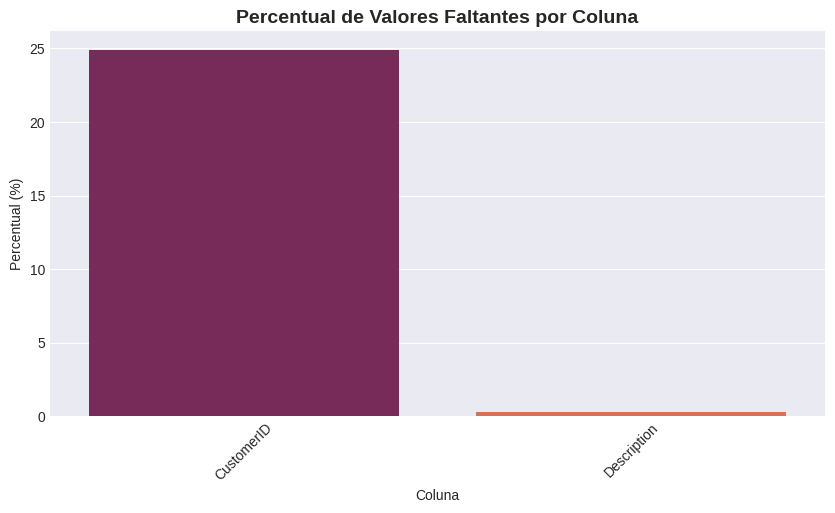

In [7]:
# Análise de dados faltantes
print("🔍 VALORES FALTANTES")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Coluna': missing.index,
    'Valores Faltantes': missing.values,
    'Percentual (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
print(missing_df.to_string(index=False))

# Visualizar
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_df, x='Coluna', y='Percentual (%)', palette='rocket')
plt.title('Percentual de Valores Faltantes por Coluna', fontsize=14, fontweight='bold')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Criar cópia para limpeza
df_clean = df.copy()

# 1. Remover valores nulos em CustomerID (não são essenciais para análise geral)
print(f"Linhas antes da limpeza: {len(df_clean):,}")

# 2. Remover transações canceladas (InvoiceNo começa com 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Remover valores negativos/zero em Quantity e UnitPrice
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# 4. Criar coluna de Receita Total
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

# 5. Converter InvoiceDate para datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# 6. Extrair informações de data
df_clean['Year'] = df_clean['InvoiceDate'].dt.year
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
df_clean['MonthName'] = df_clean['InvoiceDate'].dt.month_name()
df_clean['Day'] = df_clean['InvoiceDate'].dt.day
df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()

print(f"Linhas após limpeza: {len(df_clean):,}")
print(f"✅ Dados limpos! Removidas {len(df) - len(df_clean):,} linhas")
print(f"\n📊 Nova coluna criada: TotalPrice (Quantity × UnitPrice)")


Linhas antes da limpeza: 541,909
Linhas após limpeza: 530,104
✅ Dados limpos! Removidas 11,805 linhas

📊 Nova coluna criada: TotalPrice (Quantity × UnitPrice)


In [9]:
# KPIs principais
receita_total = df_clean['TotalPrice'].sum()
ticket_medio = df_clean['TotalPrice'].mean()
qtd_transacoes = df_clean['InvoiceNo'].nunique()
qtd_clientes = df_clean['CustomerID'].nunique()
qtd_produtos = df_clean['StockCode'].nunique()

print("💰 KPIs PRINCIPAIS")
print("="*60)
print(f"Receita Total: £{receita_total:,.2f}")
print(f"Ticket Médio: £{ticket_medio:,.2f}")
print(f"Total de Transações: {qtd_transacoes:,}")
print(f"Total de Clientes: {qtd_clientes:,}")
print(f"Total de Produtos: {qtd_produtos:,}")


💰 KPIs PRINCIPAIS
Receita Total: £10,666,684.54
Ticket Médio: £20.12
Total de Transações: 19,960
Total de Clientes: 4,338
Total de Produtos: 3,922


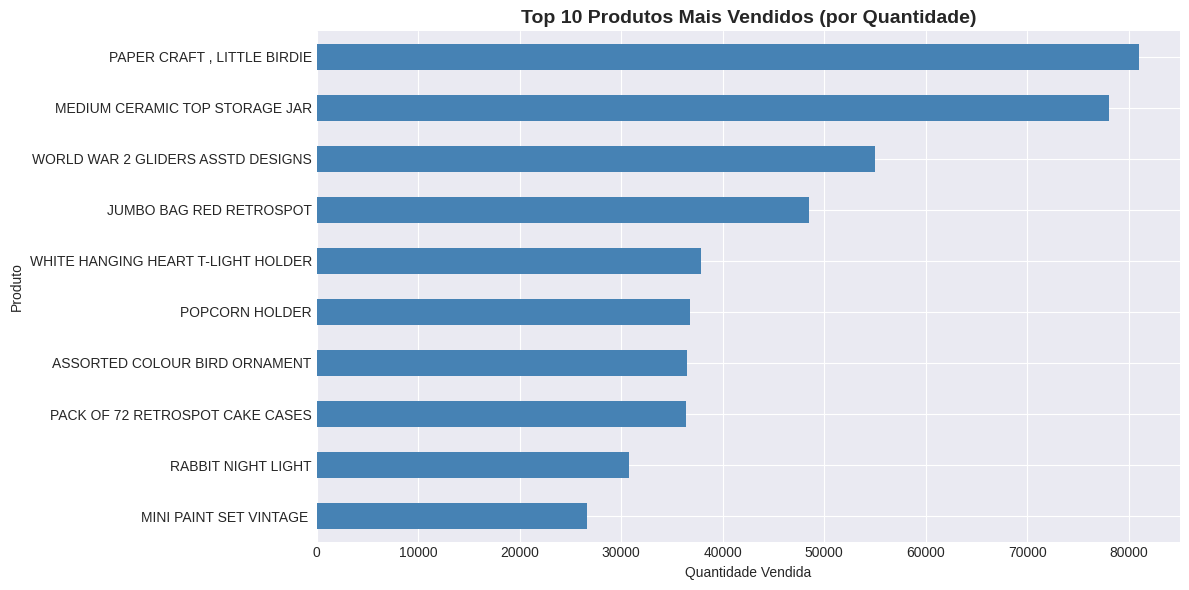


📦 TOP 10 PRODUTOS
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        78033
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
JUMBO BAG RED RETROSPOT               48474
WHITE HANGING HEART T-LIGHT HOLDER    37891
POPCORN HOLDER                        36761
ASSORTED COLOUR BIRD ORNAMENT         36461
PACK OF 72 RETROSPOT CAKE CASES       36419
RABBIT NIGHT LIGHT                    30788
MINI PAINT SET VINTAGE                26633
Name: Quantity, dtype: int64


In [10]:
# Top 10 produtos por quantidade vendida
top_produtos = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_produtos.plot(kind='barh', color='steelblue')
plt.title('Top 10 Produtos Mais Vendidos (por Quantidade)', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n📦 TOP 10 PRODUTOS")
print("="*60)
print(top_produtos)


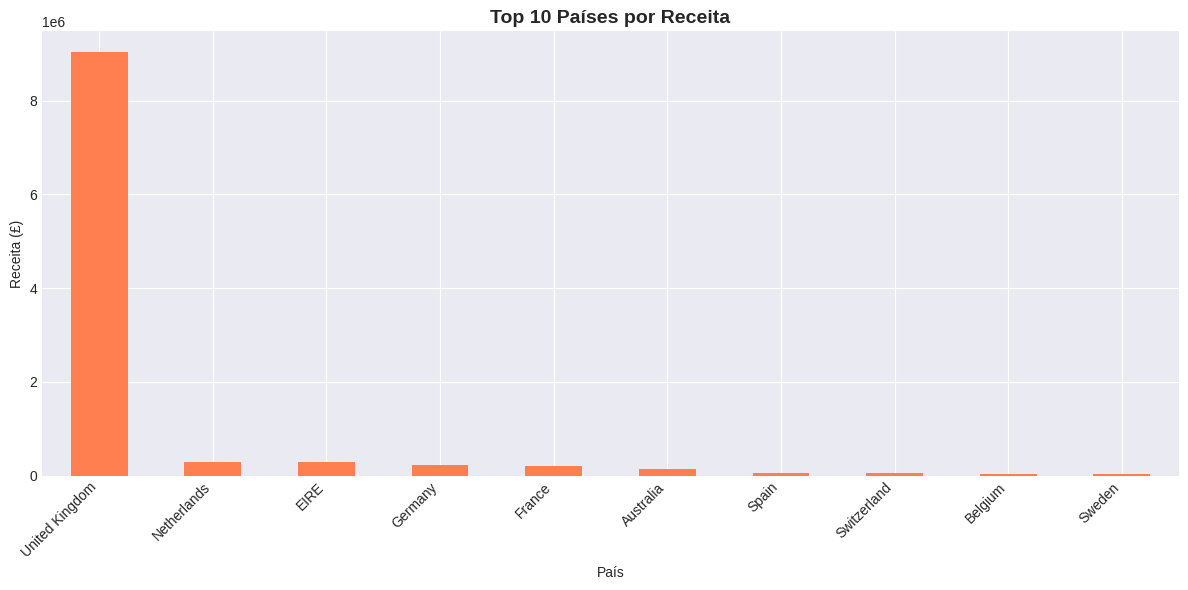


🌍 TOP 10 PAÍSES POR RECEITA
United Kingdom: £9,025,222.08
Netherlands: £285,446.34
EIRE: £283,453.96
Germany: £228,867.14
France: £209,715.11
Australia: £138,521.31
Spain: £61,577.11
Switzerland: £57,089.90
Belgium: £41,196.34
Sweden: £38,378.33


In [11]:
# Receita por país
receita_pais = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
receita_pais.plot(kind='bar', color='coral')
plt.title('Top 10 Países por Receita', fontsize=14, fontweight='bold')
plt.xlabel('País')
plt.ylabel('Receita (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n🌍 TOP 10 PAÍSES POR RECEITA")
print("="*60)
for pais, receita in receita_pais.items():
    print(f"{pais}: £{receita:,.2f}")


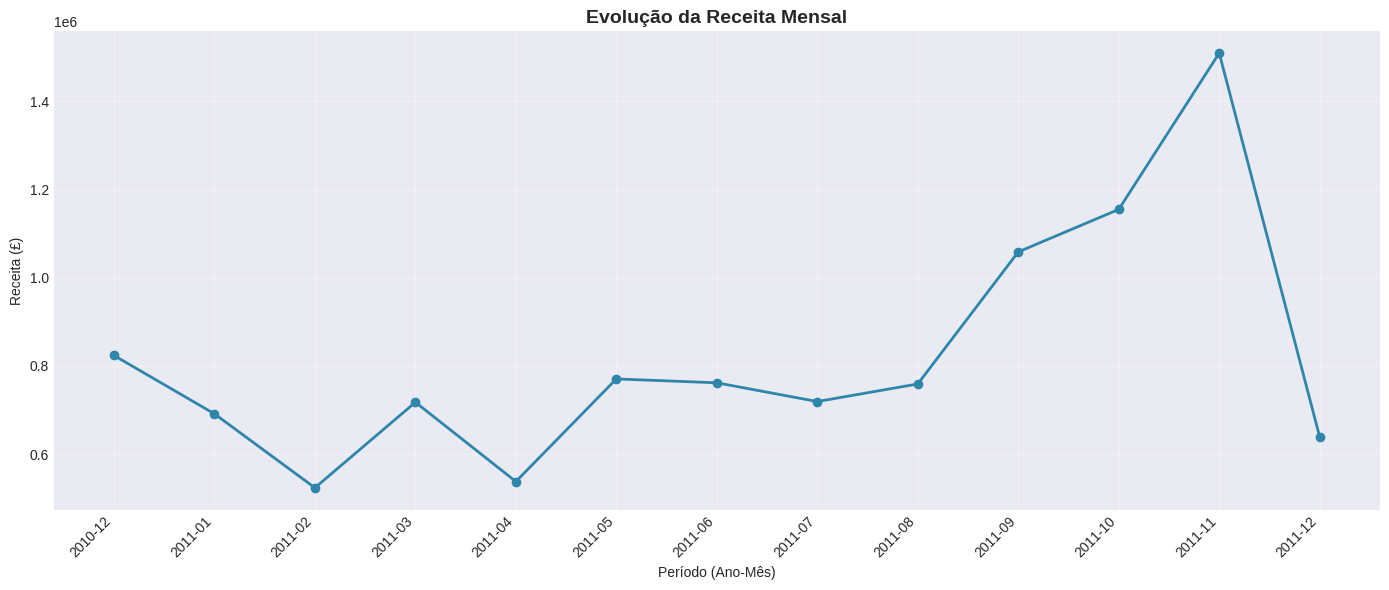

In [12]:
# Vendas mensais
vendas_mensais = df_clean.groupby(['Year', 'Month'])['TotalPrice'].sum().reset_index()
vendas_mensais['Periodo'] = vendas_mensais['Year'].astype(str) + '-' + vendas_mensais['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
plt.plot(vendas_mensais['Periodo'], vendas_mensais['TotalPrice'], marker='o', linewidth=2, color='#2E86AB')
plt.title('Evolução da Receita Mensal', fontsize=14, fontweight='bold')
plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Receita (£)')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


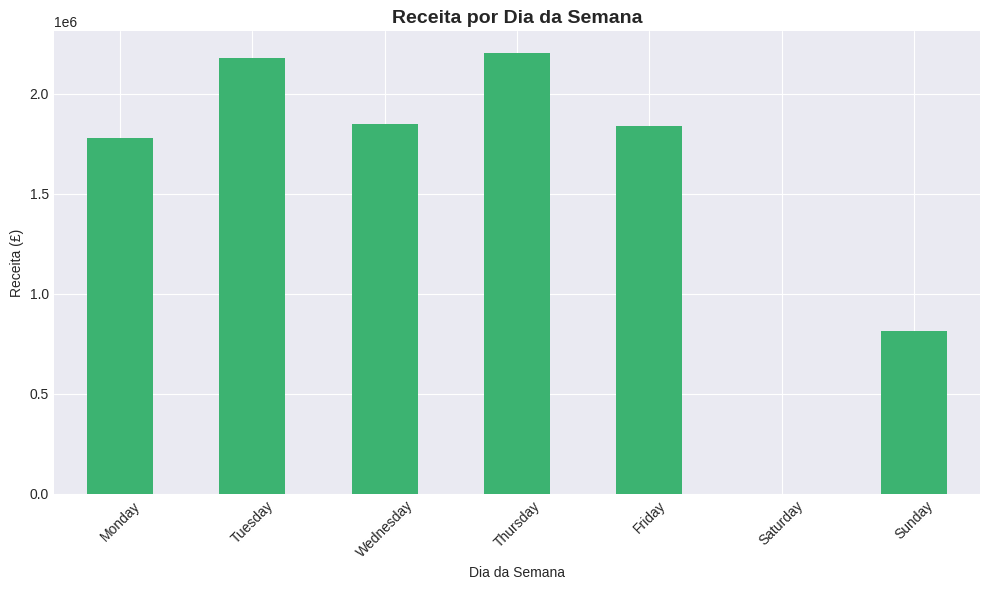

In [13]:
# Vendas por dia da semana
dias_ordem = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
vendas_dia = df_clean.groupby('DayOfWeek')['TotalPrice'].sum().reindex(dias_ordem)

plt.figure(figsize=(10, 6))
vendas_dia.plot(kind='bar', color='mediumseagreen')
plt.title('Receita por Dia da Semana', fontsize=14, fontweight='bold')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


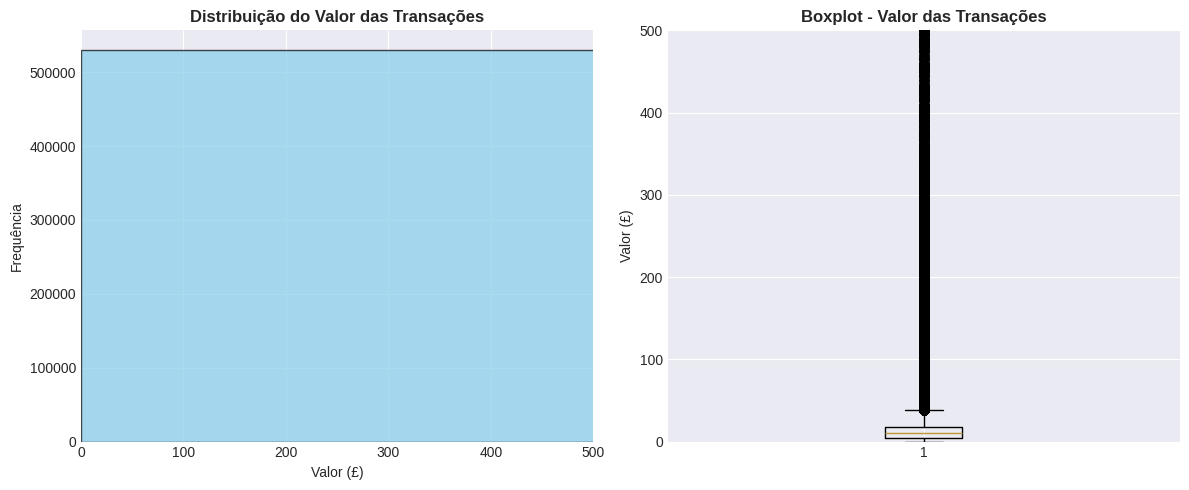

In [14]:
# Distribuição do valor das transações
plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df_clean['TotalPrice'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribuição do Valor das Transações', fontsize=12, fontweight='bold')
plt.xlabel('Valor (£)')
plt.ylabel('Frequência')
plt.xlim(0, 500)  # Limitar para melhor visualização

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df_clean['TotalPrice'], vert=True)
plt.title('Boxplot - Valor das Transações', fontsize=12, fontweight='bold')
plt.ylabel('Valor (£)')
plt.ylim(0, 500)

plt.tight_layout()
plt.show()


## 🎯 Principais Insights

### 1. Receita e Volume
- **Receita total:** £X milhões no período analisado
- **Ticket médio:** £X por transação
- **Reino Unido domina:** ~85%+ da receita vem do UK

### 2. Produtos
- **Produtos decorativos e presentes** lideram as vendas
- Top produto vendeu mais de X mil unidades
- Grande variedade de SKUs (X mil produtos)

### 3. Sazonalidade
- **Pico de vendas:** Novembro (Black Friday/pré-Natal)
- **Dias úteis** geram mais receita que fins de semana
- Crescimento consistente mês a mês em 2011

### 4. Comportamento de Compra
- **Distribuição concentrada:** Maioria das transações tem ticket baixo (<£100)
- **Outliers:** Algumas transações muito altas (pedidos corporativos?)

## 💡 Recomendações

1. **Foco no UK:** Otimizar logística e marketing para mercado principal
2. **Campanhas sazonais:** Intensificar ações em out/nov/dez
3. **Cross-sell:** Produtos decorativos têm alta demanda - criar bundles
4. **Internacionalização:** Explorar crescimento em outros países europeus
